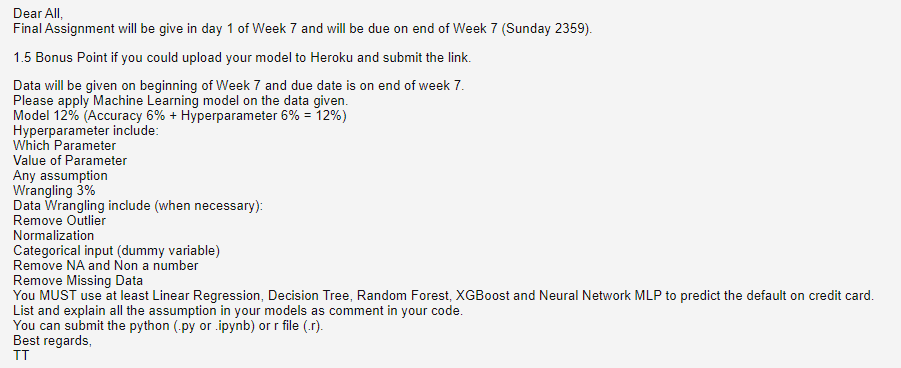

In [22]:
# Load libraries 
import pandas as pd
import numpy as np 

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load data 
df = pd.read_csv("Credit Card Default II (balance).csv")

In [24]:
# Data Description 
df.head()

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


In [25]:
print(f"Shape of data: {df.shape}")

Shape of data: (3428, 4)


## Inspect Data Quality 

<AxesSubplot:xlabel='default', ylabel='count'>

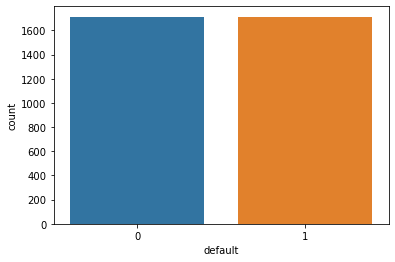

In [26]:
# Check distribution of target var "default"
sns.countplot(x=df['default'])

The dataset seems to be balance (almost evenly distributed among default and not default).

<AxesSubplot:xlabel='income', ylabel='Count'>

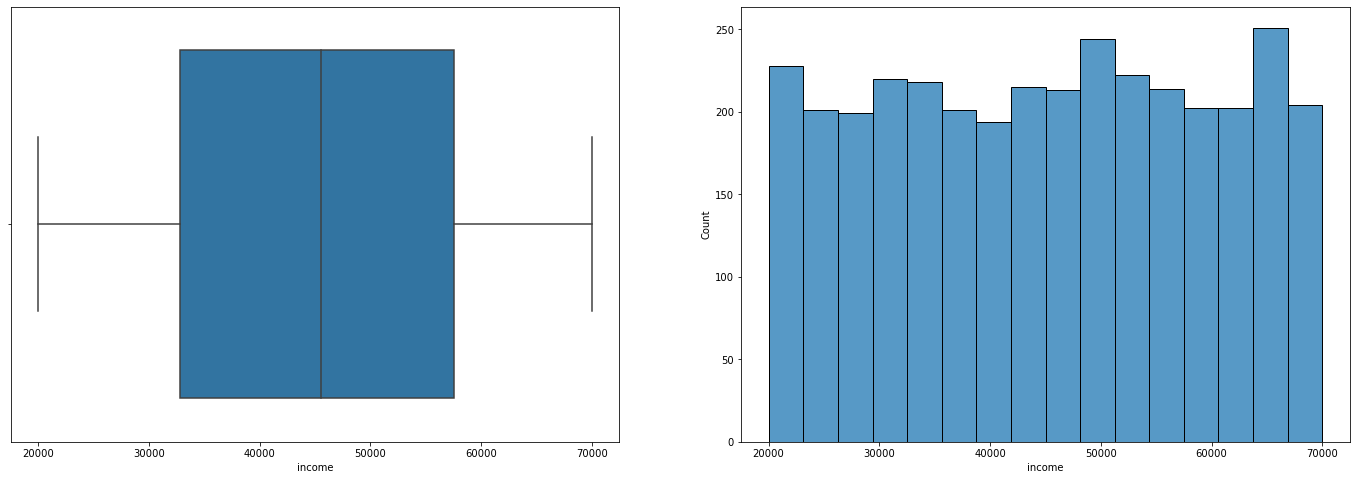

In [27]:
# Check distribution of income

f, axes = plt.subplots(1,2,figsize=(24, 8))

sns.boxplot(x=df['income'], orient='h', ax=axes[0])
sns.histplot(x=df['income'], kde=False, ax=axes[1])

<AxesSubplot:xlabel='age', ylabel='Count'>

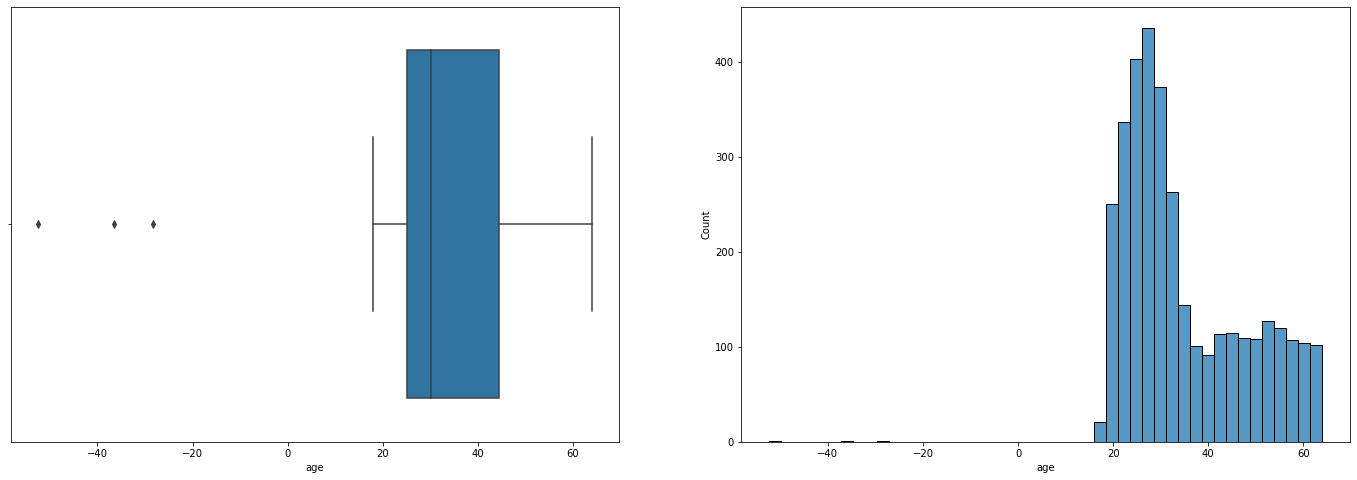

In [28]:
# Check distribution of age

f, axes = plt.subplots(1,2,figsize=(24, 8))

sns.boxplot(x=df['age'], orient='h', ax=axes[0])
sns.histplot(x=df['age'], kde=False, ax=axes[1])

Observation: There are a few negative age values.


In [29]:
# Remove rows with negative age values
df = df[df['age']>=0]

<AxesSubplot:xlabel='age'>

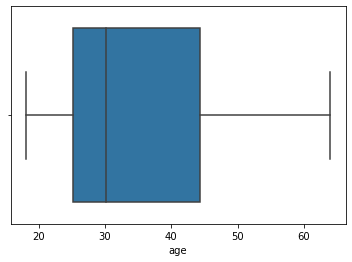

In [30]:
# Check the distribution again
sns.boxplot(x=df['age'], orient='h')

<AxesSubplot:xlabel='loan', ylabel='Count'>

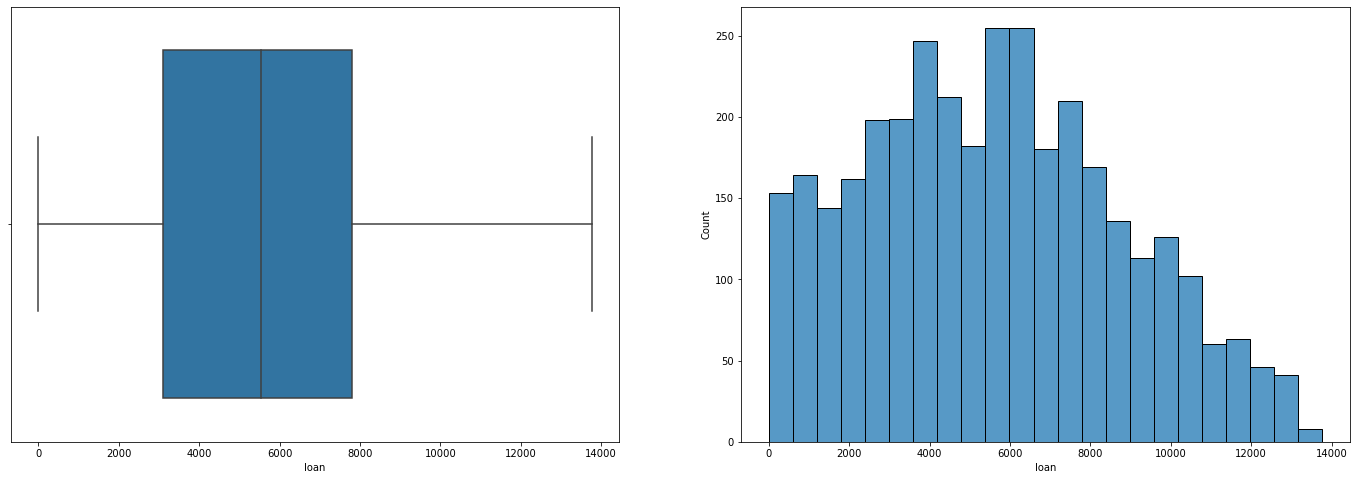

In [31]:
# Check distribution of income

f, axes = plt.subplots(1,2,figsize=(24, 8))

sns.boxplot(x=df['loan'], orient='h', ax=axes[0])
sns.histplot(x=df['loan'], kde=False, ax=axes[1])

### Check missing values 

In [32]:
print(f"There is {df.isna().sum().sum()} missing values in the dataset.")

There is 0 missing values in the dataset.


### Train-Test Split

In [33]:
X = df.loc[:,['income', 'age', 'loan']]
y = df.loc[:, 'default']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Normalize the features so that they are on the same scale

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
print(f"Train dataset (shape): {X_train.shape}")
print(f"Test dataset (shape): {X_test.shape}")

Train dataset (shape): (2568, 3)
Test dataset (shape): (857, 3)


## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
lr_predicted = lr.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr_predicted)

In [40]:
print(f"Accuracy: {round((cm_lr[0,0] + cm_lr[1,1]) / sum(sum(cm_lr)),4)}%")

Accuracy: 0.9475%


#### Tune the hyperparameter "C", which controls the amout of regularization
(Greater C means less regularization and hence more complex model.)

In [41]:
from sklearn.model_selection import GridSearchCV

grid_values_lr = {'C': np.logspace(-4,4,20)}
grid_lr = GridSearchCV(LogisticRegression(), param_grid=grid_values_lr, cv=5)

In [42]:
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])})

In [43]:
grid_lr.best_params_

{'C': 545.5594781168514}

In [44]:
grid_lr.best_score_

0.9509295287505404

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier().fit(X_train, y_train)
print(f"Accuracy: {round(dtree.score(X_test, y_test),4)}%")

Accuracy: 0.9872%


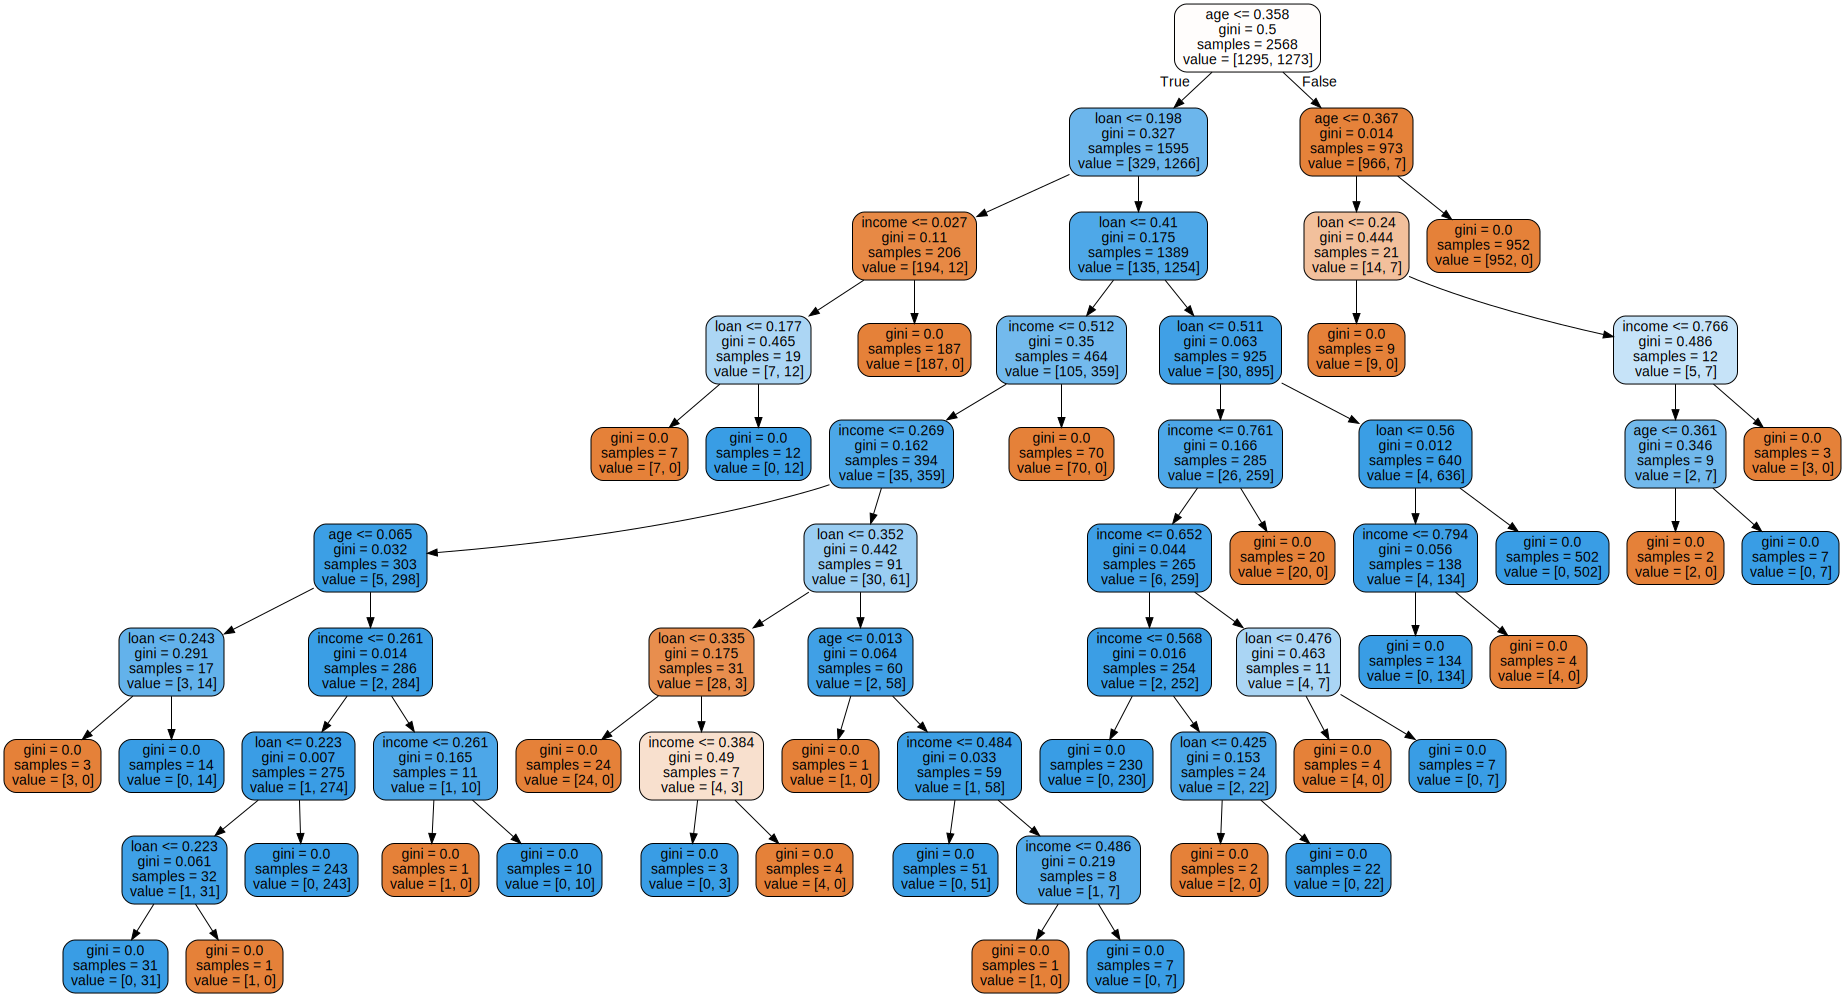

In [46]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dtree, feature_names=X.columns, filled=True, rounded=True)

import graphviz
graphviz.Source(treedot)

In [47]:
grid_values_dtree = {"max_depth": range(1,10),
                    "min_samples_split": range(2,10),
                    "min_samples_leaf": range(1,10)}

grid_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid=grid_values_dtree, cv=5)

In [48]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [49]:
grid_dtree.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [50]:
grid_dtree.best_score_

0.9883162293975319

## Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

print(f"Accuracy: {round(rf.score(X_test, y_test), 4)}%")

Accuracy: 0.9825%


In [52]:
grid_values_rf = {"n_estimators": range(10, 30, 5),
                    "max_features": [1,2,3], 
                    "max_depth": range(1,10),
                    "min_samples_split": range(2,5),
                    "min_samples_leaf": range(1,5)}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=grid_values_rf, cv=5)

In [53]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10), 'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(10, 30, 5)})

In [54]:
rf_best_params = grid_rf.best_params_
rf_best_params

{'max_depth': 8,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [55]:
grid_rf.best_score_

0.9926024529546954

## XGBoost

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)

[16:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [58]:
print(f"Accuracy: {round(xgb.score(X_test, y_test), 4)}%")

Accuracy: 0.9872%


## Network MLP

In [98]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout 

In [99]:
model = Sequential()

In [100]:
model.add(Dense(10, input_dim=3, activation="relu"))

In [101]:
model.add(Dropout(0.2))

In [102]:
model.add(Dense(20, activation="relu"))

In [103]:
model.add(Dropout(0.2))

In [104]:
# Output Layer
model.add(Dense(1, activation="sigmoid"))

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                40        
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"])

In [107]:
model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
257/257 [==============================] - 0s 588us/step - loss: 0.6188 - accuracy: 0.7237
Epoch 2/10
257/257 [==============================] - 0s 553us/step - loss: 0.4156 - accuracy: 0.8414
Epoch 3/10
257/257 [==============================] - 0s 561us/step - loss: 0.2957 - accuracy: 0.8853
Epoch 4/10
257/257 [==============================] - 0s 553us/step - loss: 0.2505 - accuracy: 0.9049
Epoch 5/10
257/257 [==============================] - 0s 580us/step - loss: 0.1963 - accuracy: 0.9330
Epoch 6/10
257/257 [==============================] - 0s 647us/step - loss: 0.1942 - accuracy: 0.9324
Epoch 7/10
257/257 [==============================] - 0s 568us/step - loss: 0.1554 - accuracy: 0.9451
Epoch 8/10
257/257 [==============================] - 0s 600us/step - loss: 0.1576 - accuracy: 0.9372
Epoch 9/10
257/257 [==============================] - 0s 588us/step - loss: 0.1489 - accuracy: 0.9487
Epoch 10/10
257/257 [==============================] - 0s 603us/step - loss: 0.130

In [108]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 575us/step - loss: 0.0952 - accuracy: 0.9662


[0.09522707760334015, 0.9661610126495361]

In [125]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=[10,10], alpha=5.0, random_state=0, solver='lbfgs')
mlp.fit(X_train, y_train)

C:\Users\Stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=5.0, hidden_layer_sizes=[10, 10], random_state=0,
              solver='lbfgs')

In [126]:
print(f"Accuracy: {round(mlp.score(X_test, y_test), 4)}%")

Accuracy: 0.9825%


## Export Model

Export the MLP Classifier since it performs well on the test set (high accuracy on the test set).

In [127]:
import joblib
joblib.dump(mlp, "predictdefault")

['predictdefault']

## Open model from file

In [128]:
# Test the prediction
model = joblib.load("predictdefault")
mlp.predict([[1000, 18, 6000]])

array([1], dtype=int64)